In [ ]:
pip install --upgrade numpy

In [ ]:
conda install numpy=1.16.5

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import descartes
from matplotlib import pyplot
import mapclassify as mc
from mpl_toolkits.axes_grid1 import make_axes_locatable
import adjustText as aT

In [2]:
chicago = gpd.read_file('Boundaries - ZIP Codes') #reading in shp 
chicago

,objectid,shape_area,shape_len,zip,geometry
0,33.0,1.060523e+08,42720.044406,60647,"POLYGON ((-87.67762 41.91776, -87.67761 41.917..."
1,34.0,1.274761e+08,48103.782721,60639,"POLYGON ((-87.72683 41.92265, -87.72693 41.922..."
2,35.0,4.506904e+07,27288.609612,60707,"POLYGON ((-87.78500 41.90915, -87.78531 41.909..."
3,36.0,7.085383e+07,42527.989679,60622,"POLYGON ((-87.66707 41.88885, -87.66707 41.888..."
4,37.0,9.903962e+07,47970.140153,60651,"POLYGON ((-87.70656 41.89555, -87.70672 41.895..."
...,...,...,...,...,...
56,57.0,1.552855e+08,53406.915617,60623,"POLYGON ((-87.69479 41.83008, -87.69486 41.830..."
57,58.0,2.111148e+08,58701.325375,60629,"POLYGON ((-87.68306 41.75786, -87.68306 41.757..."
58,59.0,2.116961e+08,58466.160298,60620,"POLYGON ((-87.62373 41.72167, -87.62388 41.721..."
59,60.0,1.254243e+08,52377.854541,60637,"POLYGON ((-87.57691 41.79511, -87.57700 41.795..."


In [3]:
df = pd.read_csv('COVID-19_Cases__Tests__and_Deaths_by_ZIP_Code.csv') #reading in csv
df = df.dropna()
df = df.loc[df['Week Number'] == 4]
df

,ZIP Code,Week Number,Week Start,Week End,Cases - Weekly,Cases - Cumulative,Case Rate - Weekly,Case Rate - Cumulative,Tests - Weekly,Tests - Cumulative,...,Test Rate - Cumulative,Percent Tested Positive - Weekly,Percent Tested Positive - Cumulative,Deaths - Weekly,Deaths - Cumulative,Death Rate - Weekly,Death Rate - Cumulative,Population,Row ID,ZIP Code Location
30,60639,4,01/24/2021,01/30/2021,200.0,12653.0,221.0,13978.6,2140.0,80460,...,88889.4,0.1,0.2,3,207,3.3,228.7,90517,60639-2021-4,POINT (-87.75531 41.920609)
49,60609,4,01/24/2021,01/30/2021,98.0,6271.0,159.0,10197.6,1664.0,57230,...,93064.5,0.1,0.1,2,122,3.3,198.4,61495,60609-2021-4,POINT (-87.653382 41.812017)
89,60626,4,01/24/2021,01/30/2021,45.0,3539.0,90.0,7116.4,3776.0,76087,...,153000.2,0.0,0.0,1,153,2.0,307.7,49730,60626-2021-4,POINT (-87.669834 42.009469)
136,60655,4,01/24/2021,01/30/2021,43.0,2799.0,149.0,9717.4,657.0,25892,...,89890.3,0.1,0.1,0,32,0.0,111.1,28804,60655-2021-4,POINT (-87.701434 41.696456)
243,60641,4,01/24/2021,01/30/2021,124.0,7484.0,175.0,10537.4,2279.0,76008,...,107018.9,0.1,0.1,1,103,1.4,145.0,71023,60641-2021-4,POINT (-87.746791 41.946682)
293,60629,4,01/24/2021,01/30/2021,199.0,15287.0,178.0,13667.4,2238.0,90535,...,80943.2,0.1,0.2,4,212,3.6,189.5,111850,60629-2021-4,POINT (-87.711565 41.777061)
329,60642,4,01/24/2021,01/30/2021,40.0,1549.0,198.0,7667.9,634.0,25238,...,124934.4,0.1,0.1,0,20,0.0,99.0,20201,60642-2021-4,POINT (-87.657821 41.899935)
354,60621,4,01/24/2021,01/30/2021,23.0,1885.0,79.0,6490.6,548.0,20951,...,72140.3,0.1,0.1,2,72,6.9,247.9,29042,60621-2021-4,POINT (-87.638812 41.776931)
365,60661,4,01/24/2021,01/30/2021,18.0,616.0,181.0,6205.9,312.0,11361,...,114457.0,0.1,0.1,0,1,0.0,10.1,9926,60661-2021-4,POINT (-87.644283 41.882786)
375,60614,4,01/24/2021,01/30/2021,69.0,4168.0,97.0,5845.1,3142.0,95711,...,134222.0,0.0,0.0,0,85,0.0,119.2,71308,60614-2021-4,POINT (-87.652064 41.922605)


In [4]:
merged = chicago.merge(df, left_on='zip', right_on='ZIP Code', how='left') #merge into gdf (with all states)
merged

,objectid,shape_area,shape_len,zip,geometry,ZIP Code,Week Number,Week Start,Week End,Cases - Weekly,...,Test Rate - Cumulative,Percent Tested Positive - Weekly,Percent Tested Positive - Cumulative,Deaths - Weekly,Deaths - Cumulative,Death Rate - Weekly,Death Rate - Cumulative,Population,Row ID,ZIP Code Location
0,33.0,1.060523e+08,42720.044406,60647,"POLYGON ((-87.67762 41.91776, -87.67761 41.917...",60647,4.0,01/24/2021,01/30/2021,145.0,...,120999.0,0.1,0.1,1.0,138.0,1.1,157.7,87509.0,60647-2021-4,POINT (-87.701101 41.921058)
1,34.0,1.274761e+08,48103.782721,60639,"POLYGON ((-87.72683 41.92265, -87.72693 41.922...",60639,4.0,01/24/2021,01/30/2021,200.0,...,88889.4,0.1,0.2,3.0,207.0,3.3,228.7,90517.0,60639-2021-4,POINT (-87.75531 41.920609)
2,35.0,4.506904e+07,27288.609612,60707,"POLYGON ((-87.78500 41.90915, -87.78531 41.909...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,36.0,7.085383e+07,42527.989679,60622,"POLYGON ((-87.66707 41.88885, -87.66707 41.888...",60622,4.0,01/24/2021,01/30/2021,76.0,...,134718.6,0.0,0.1,2.0,68.0,3.8,128.8,52793.0,60622-2021-4,POINT (-87.681818 41.902762)
4,37.0,9.903962e+07,47970.140153,60651,"POLYGON ((-87.70656 41.89555, -87.70672 41.895...",60651,4.0,01/24/2021,01/30/2021,103.0,...,81230.0,0.1,0.2,0.0,122.0,0.0,193.0,63218.0,60651-2021-4,POINT (-87.741017 41.901964)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,57.0,1.552855e+08,53406.915617,60623,"POLYGON ((-87.69479 41.83008, -87.69486 41.830...",60623,4.0,01/24/2021,01/30/2021,118.0,...,77170.0,0.1,0.2,2.0,233.0,2.3,271.0,85979.0,60623-2021-4,POINT (-87.717446 41.850321)
57,58.0,2.111148e+08,58701.325375,60629,"POLYGON ((-87.68306 41.75786, -87.68306 41.757...",60629,4.0,01/24/2021,01/30/2021,199.0,...,80943.2,0.1,0.2,4.0,212.0,3.6,189.5,111850.0,60629-2021-4,POINT (-87.711565 41.777061)
58,59.0,2.116961e+08,58466.160298,60620,"POLYGON ((-87.62373 41.72167, -87.62388 41.721...",60620,4.0,01/24/2021,01/30/2021,73.0,...,78700.7,0.1,0.1,0.0,117.0,0.0,171.8,68096.0,60620-2021-4,POINT (-87.651656 41.740873)
59,60.0,1.254243e+08,52377.854541,60637,"POLYGON ((-87.57691 41.79511, -87.57700 41.795...",60637,4.0,01/24/2021,01/30/2021,55.0,...,176598.4,0.0,0.0,1.0,51.0,2.1,107.5,47454.0,60637-2021-4,POINT (-87.604053 41.780991)


In [5]:
merged["center"] = merged["geometry"].centroid
merged_points1 = merged.copy()
merged_points1.set_geometry("center", inplace = True)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


Text(0.5, 1, 'Cases in the last week')

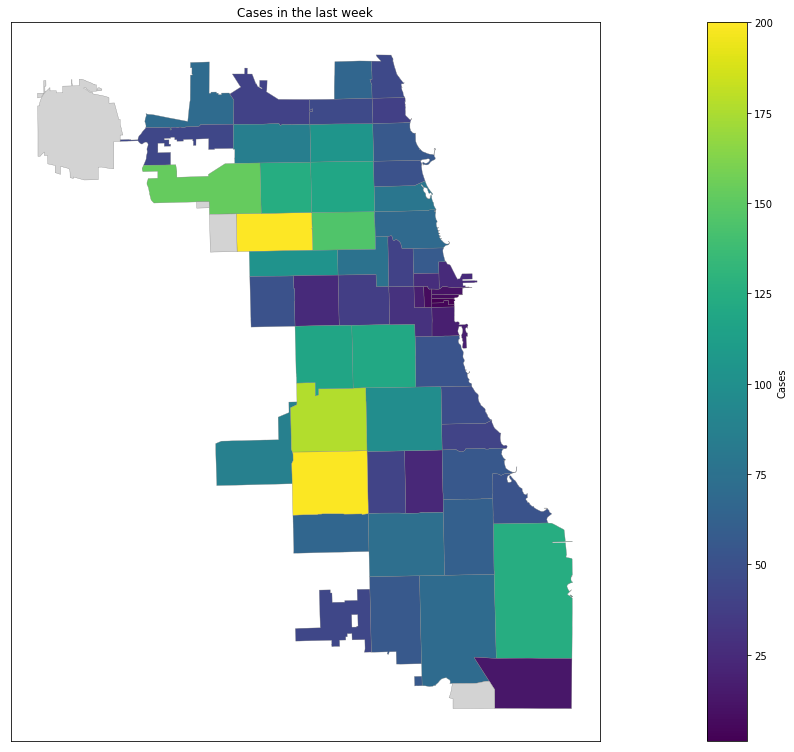

In [6]:
fig, ax = pyplot.subplots(1,1, figsize=(15,15))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

merged.plot(ax=ax, column='Cases - Weekly', missing_kwds={'color':'lightgrey'},
                 edgecolor='grey', linewidth=.3, legend=True, cax=cax,
                legend_kwds={'label':'Cases', 'orientation':'vertical'})
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Cases in the last week')